<h1>Project 01</h1> 
<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<h2>Introduction</h2>
<h3>Random Graphs</h3>
<p> One popular topic of study in graph theory applied to social networks is that of
processes for generating random graphs, where the edges in the graph are added according to some
kind of stochastic (randomized) algorithm. One of the reasons researchers are interested in random
graph models is that real social networks can be pretty hard to obtain, and even if you could get
your hands on something like Facebook’s friend graph (hint: Facebook doesn’t let most people look
at that), it would be so full of real human details that actually studying it would be problematic
from an ethics and privacy standpoint. So researchers would like to come up with ways to generate
synthetic networks which “look like” real human networks; they want these synthetic networks to
be randomized so that they can make many of them and simulate various social processes on them.
Unfortunately, generating random networks that “look like” real social networks turns out to be
surprisingly hard to do. In this project, you’ll experiment with a simple random graph model. This
will give you hands-on experience in thinking about how to ask this course’s style of questions using
code.</p>
<h2>Assignment</h2>
<ol>
<li>Implement this random graph model in code. You may use any system you like as long as
the above idea is implemented faithfully. If you want to provide examples visually to show
that your code works (using a visualization tool like NetworkX), clearly state what values of
$$n$$ and $$p$$ your examples are using.
</li>
<h4>Delieverable 1:</h4>
<p>The code for your random graph model. If you give visual examples of graphs created by your
algorithm, please annotate them clearly with values of $$n$$ and $$p$$.</p>
</ol>






In [83]:
# Import libraries
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import datetime, time, os, random, copy
 

In [84]:
class Graph(nx.Graph):
    def __init__(self, grph_nm=""):
        super().__init__()
        self.graph_name = f"Graph--{grph_nm}"
        self.graph_size = 0
        self.node_list = []
        self.component_proba_dict = {i: [int(), int()] for i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9, 1.0]}
        
    def __str__(self):
        obj_str = f"-------------- {self.graph_name} --------------\n"
        obj_str += f"Grahp class Attributes:\n"
        for i in self.__dict__:
            obj_str += f"\t\t\t{i}\n"
        obj_str += f"Graph component count:\t{nx.number_connected_components(self)}\n"        
        obj_str += f"Graph degree Average:\t{self.degree}\n"        
        obj_str += f"Graph edge count:\t{self.number_of_edges()}\n"
        # obj_str += f"Graph node dict:\n"
        # for node, edges in self._node.items():
        #     obj_str += f"\t{node}:\t{edges}\n"
        obj_str += f"Graph edge dict:\n"
        for node, edges in self._adj.items():
            obj_str += f"\t{node}:\t{edges}\n"
        
        return obj_str

    # Create function to generate random number of nodes no more than
    # the amount set by user, and create and returns a list of all 
    # possible nodes that exsist with in the randomnly selected 
    # amount of nodes. 
    def genRandomListOfNodes(self, max=10, min=2):
        '''
        Generates list of different set pairs for each node that exsist
        in a randomly sized list of nodes that is equal to or less than 
        the passed agrument 'max' value.  
        @param max Represents the max number of nodes that can be 
        generated from random graph generation of 'human network(s)' 
        (By default max is set to 10).
        '''
        # Randomnly selcected number of nodes to construct node_list
        n = random.randint(min, max)
        for node in range(0, n):
            self.node_list.append(f"n_{node}")
            self.add_node(f"n_{node}")
        n_lst=list(combinations(self.node_list, 2))
        # Returning list of nodes represented as n_i nodes
        return n_lst, n
    
    def genSetListOfNodes(self, sn):
        '''
        '''
        # Randomnly selcected number of nodes to construct node_list
        for node in range(0, sn):
            self.node_list.append(f"n_{node}")
            self.add_node(f"n_{node}")
        n_lst=list(combinations(self.node_list, 2))
        # Returning list of nodes represented as n_i nodes
        return n_lst, sn

    # Create function to generate the probability of an edge forming
    # between a set of nodes.  Implement this to do so randomnly. 
    def randomEdgeConnect(self, prob):
        '''
        Generates proability of an edge forming AT RANDOM If p=1 generate
        edge if p=0 don't generate edge.
        '''
        edge_probability = np.random.choice([0, 1], 1, p=[1-prob, prob])
        return edge_probability == [1]

    def showGraph(self):
        # Show each graph.    
        print(self)
        plt.title(f"{self.graph_name}-Kamada Kawai Layout")
        nx.draw(self, pos=nx.kamada_kawai_layout(self,
                                                scale=1, center=None, dim=2), 
                                                with_labels=False,
                                                node_size=300, width=2.5, 
                                                node_shape="8", node_color="#000000",
                                                font_color="#FFFFFF")
        plt.show()

<ol start="2" >
<li>Thinking about global connectivity as a function of p. If p = 0, the graph is always empty
(no edges). If p = 1, the graph is always complete (all edges). This means that in between,
in some sense the graph goes from being empty to having many components, to having a
giant component, to eventually being a connected graph. But each graph is random, so in
what sense can we think about this transition? Here, we need to ask our questions in terms of
statistical ideas like average and percentile. A very simple way to measure global connectivity
is by asking how many components does the graph have? Your assignment is to explore the
relationship between p and the number of components in a graph. Follow the directions in
Deliverable 2 precisely.
</li>
<h4>Delieverable 2:</h4>
<p>Choose a fixed value of n (ideally larger than 100). Create a plot which has
# of components on the vertical axis, and p on the horizontal axis. For each value of p that
you study (you should check at least the values p = 0.1, p = 0.2, p = 0.3, . . . , p = 0.9),
generate 10 (or more) random graphs and plot the # of components in each of those generated
graphs. In addition, for each value of p, compute the average # of components and plot that
using a distinct color.</p>
<p>You may use any technique you want to compute the # of components. We’ve already seen
an algorithm for answering this question (based on BFS), or you could use a built-in method
in a package like NetworkX.Is there a threshold on p above which all your generated graphs
are connected?</p>
</ol>

[('n_0', 0), ('n_1', 0), ('n_2', 0), ('n_3', 0), ('n_4', 0), ('n_5', 0), ('n_6', 0), ('n_7', 0), ('n_8', 0), ('n_9', 0)]
[('n_0', 4), ('n_1', 5), ('n_2', 2), ('n_3', 5), ('n_4', 5), ('n_5', 3), ('n_6', 2), ('n_7', 4), ('n_8', 5), ('n_9', 5)]
[('n_0', 10), ('n_1', 9), ('n_2', 9), ('n_3', 7), ('n_4', 8), ('n_5', 8), ('n_6', 9), ('n_7', 11), ('n_8', 8), ('n_9', 9)]
[('n_0', 11), ('n_1', 11), ('n_2', 11), ('n_3', 11), ('n_4', 11), ('n_5', 11), ('n_6', 11), ('n_7', 11), ('n_8', 11), ('n_9', 11)]
[('n_0', 11), ('n_1', 11), ('n_2', 11), ('n_3', 11), ('n_4', 11), ('n_5', 11), ('n_6', 11), ('n_7', 11), ('n_8', 11), ('n_9', 11)]
[('n_0', 11), ('n_1', 11), ('n_2', 11), ('n_3', 11), ('n_4', 11), ('n_5', 11), ('n_6', 11), ('n_7', 11), ('n_8', 11), ('n_9', 11)]
[('n_0', 11), ('n_1', 11), ('n_2', 11), ('n_3', 11), ('n_4', 11), ('n_5', 11), ('n_6', 11), ('n_7', 11), ('n_8', 11), ('n_9', 11)]
[('n_0', 11), ('n_1', 11), ('n_2', 11), ('n_3', 11), ('n_4', 11), ('n_5', 11), ('n_6', 11), ('n_7', 11), ('n_8'

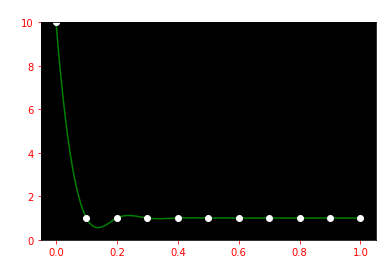

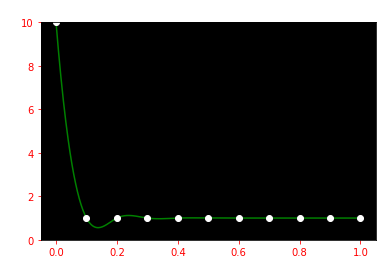

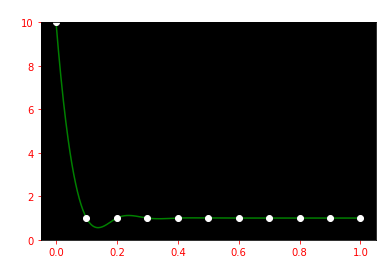

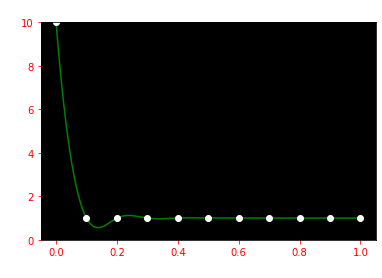

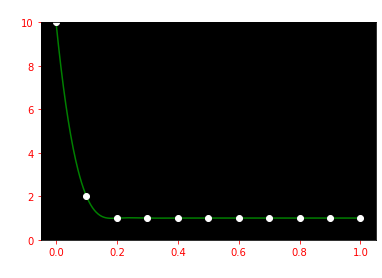

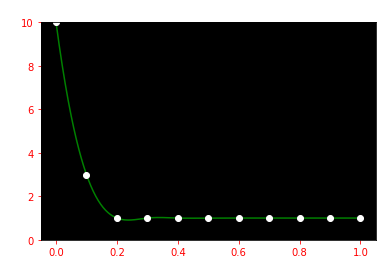

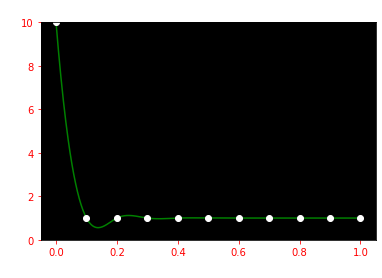

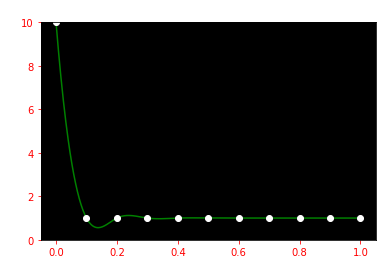

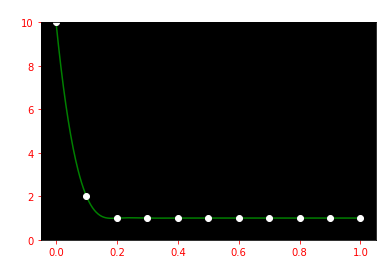

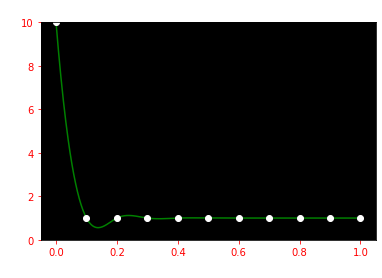

In [85]:
# Create different amount of different sized graphs up to specified size.
amount_of_graphs = 10
max_size_of_graphs = 10
min_size_of_graphs = 2
set_size_of_graphs = max_size_of_graphs

list_of_graphs = []

# Iterate through each graph we want to create, intialize, and display 
#   • Graph name
#   • Number of edges 
#   • Number of nodes 
#   • Visual diplay of graph
#   • Delevriable part 2

# Iterate through and create instances of graph then append them to a list of graphs. 
for grph_indx in range(1, amount_of_graphs+1):
    temp_graph_obj = Graph(grph_nm=f"{grph_indx}")
    # Iterate through each probability between 1 and 0 for edge forming between two nodes
    for edge_prob in temp_graph_obj.component_proba_dict.keys():
        # Get our value for number of nodes (n) for our graphs generated
        # node_pair_set_list, amount_of_nodes = temp_graph_obj.genRandomListOfNodes(max=max_size_of_graphs, min=min_size_of_graphs)
        node_pair_set_list, amount_of_nodes = temp_graph_obj.genSetListOfNodes(set_size_of_graphs)
        set_size_of_graphs
        temp_graph_obj.graph_size = amount_of_nodes
        
        # For each pair we evaluate if we create an edge inbetween them
        for pair_nodes in node_pair_set_list:
            # Connect edges inbetween each node by selcting at random.
            create_edge_bool = temp_graph_obj.randomEdgeConnect(edge_prob)
            if create_edge_bool:
                temp_graph_obj.add_edge(pair_nodes[0],
                            pair_nodes[1],
                            weight=1)
                
        # Keep track of each graphs different probabilities components   
        temp_graph_obj.component_proba_dict.get(edge_prob)[0] = nx.number_connected_components(temp_graph_obj)
        print(temp_graph_obj.degree)
        # print( nx.average_degree_connectivity(temp_graph_obj))

        temp_graph_obj.component_proba_dict.get(edge_prob)[1] = temp_graph_obj.degree
        
        # Show visualization of graph
        # temp_graph_obj.showGraph()
    

    list_of_graphs.append(temp_graph_obj)   
    
# Show line graph of plotted p values and number of different component in the x-axis and to the y-axis respectively
for graph in list_of_graphs:
    # Create graph for components for each edge pobability.
    xx = [proab_graph_var for proab_graph_var in graph.component_proba_dict.keys()] 
    yy = [num_componts[0] for num_componts in graph.component_proba_dict.values()] 
    x = np.array(xx)
    y = np.array(yy)
    X_Y_Spline = make_interp_spline(x, y)
    X_= np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    ax = plt.axes()
    # ax.text(1, 1, f"Edge Proabability: {edge_prob}", c='white')  
    ax.set_title(graph.graph_name, c='white')
    ax.set_ylabel(f"Number of Components", c='white')
    ax.set_xlabel("Edge Probability (p={0.1-0.9})", c='white')
    ax.set_ylim(0, max_size_of_graphs)
    ax.set_facecolor('black')
    ax.tick_params(axis='x', colors='red')
    ax.tick_params(axis='y', colors='red') 
    plt.plot(X_, Y_, 'g')
    plt.plot(xx, yy, 'wo')          
    plt.show(ax)
    


    

    



<ol start="3" >
<li>Thinking about local connectivity as a function of p. If p = 0, every node has 0 neighbors
(the degree of every node is 0). If p = 1, every node has n − 1 neighbors (the degree of every
node is n − 1). In between, the average degree of nodes increases. Your assignment is to
explore the relationship between p and the average node degree on the network. Follow the
directions in Deliverable 3 precisely.</li>
<h4>Delieverable 3:</h4>
<p>Choose a fixed value of n (ideally larger than 100). Create a plot which has
average node degree on the vertical axis, and p on the horizontal axis. For each value of p
that you study (you should check at least the values p = 0.1, p = 0.2, p = 0.3, . . . , p = 0.9),
generate 10 (or more) random graphs, compute the average node degree (the average number
of neighbors over all nodes), and plot the average degree from each of those generated graphs.
In addition, for each value of p, compute the average (over all generated graphs) average node
degree and plot that using a distinct color.</p>
<p>You may use any technique you want to compute the average node degree.</p>
</ol>

In [86]:
# Show line graph of plotted p values and number of different component in the x-axis and to the y-axis respectively
for graph in list_of_graphs:
    # Create graph for components for each edge pobability.
    xx = [proab_graph_var for proab_graph_var in graph.component_proba_dict.keys()] 
    yy = [num_componts[1] for num_componts in graph.component_proba_dict.values()] 
    x = np.array(xx)
    y = np.array(yy)
    X_Y_Spline = make_interp_spline(x, y)
    X_= np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    ax = plt.axes()
    # ax.text(1, 1, f"Edge Proabability: {edge_prob}", c='white')  
    ax.set_title(graph.graph_name, c='white')
    ax.set_ylabel(f"Number of Components", c='white')
    ax.set_xlabel("Edge Probability (p={0.1-0.9})", c='white')
    ax.set_ylim(0, max_size_of_graphs)
    ax.set_facecolor('black')
    ax.tick_params(axis='x', colors='red')
    ax.tick_params(axis='y', colors='red') 
    plt.plot(X_, Y_, 'g')
    plt.plot(xx, yy, 'wo')          
    plt.show(ax)

ValueError: could not convert string to float: 'n_0'